In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df_train = pd.read_csv('Train_TP2_Datos_2020-2C.csv')
df_test = pd.read_csv('Test_TP2_Datos_2020-2C.csv')

In [ ]:
train = df_train[(df_train.Stage == 'Closed Won') | (df_train.Stage == 'Closed Lost')]
cambio_binario = {'Closed Lost' : 0, 'Closed Won' : 1}
train['Stage'] = train['Stage'].map(cambio_binario)
train['Opportunity_Created_Date'] = pd.to_datetime(train['Opportunity_Created_Date'])
train['años'] = train['Opportunity_Created_Date'].dt.year
train['meses'] = train['Opportunity_Created_Date'].dt.month
train.sort_values(['años', 'meses'], ascending=True, inplace=True)
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,años,meses
16104,12714,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Opportunity_Name_5265,12369,None,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2013-11-05,Brand_21,Product_Type_2,Size_3,Product_Category_B_14,Other,EUR,NaT,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,NaT,2,EUR,662287.50,EUR,662287.50,0,Prod_Category_A_None,2013,11
16105,18684,APAC,Philippines,1,1,1,1,0,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Opportunity_Name_4731,12370,None,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2014-03-21,None,None,None,None,None,None,NaT,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,NaT,20,USD,9803430.00,USD,9803430.00,0,Prod_Category_A_None,2014,3
16106,20675,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,2014,3
16107,20682,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,2014,3
16108,20513,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,NaT,6,USD,4395304.00,USD,31410780.00,1,Prod_Category_A_None,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,22652,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,9/23/2013,Source_13,Japan,Account_Name_1991,Opportunity_Name_8090,11205,5586,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2018-12-26,None,None,None,None,None,None,NaT,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,2/4/2019,2/4/2019,2019 - 2,Q1,2019,NaT,0,JPY,1071840.00,JPY,1071840.00,1,Prod_Category_A_None,2018,12
16100,20803,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,Source_11,United S

In [ ]:
train=train.drop('ID', axis=1)

In [ ]:
territory = train.groupby('Opportunity_ID').agg({'Territory':'max', 'Billing_Country':'max'})
territory.tail(10)

,Territory,Billing_Country
Opportunity_ID,,
12794,United Kingdom,Germany
12795,Germany,Germany
12796,Germany,Germany
12797,Germany,Germany
12798,Germany,Germany
12799,Norway,Germany
12800,NE America,Germany
12801,Austria,Austria
12802,NE America,United States


In [ ]:
train

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,años,meses
16104,EMEA,France,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Opportunity_Name_5265,12369,None,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2013-11-05,Brand_21,Product_Type_2,Size_3,Product_Category_B_14,Other,EUR,NaT,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,NaT,2,EUR,662287.50,EUR,662287.50,0,Prod_Category_A_None,2013,11
16105,APAC,Philippines,1,1,1,1,0,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Opportunity_Name_4731,12370,None,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2014-03-21,None,None,None,None,None,None,NaT,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,NaT,20,USD,9803430.00,USD,9803430.00,0,Prod_Category_A_None,2014,3
16106,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,2014,3
16107,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,2014,3
16108,Americas,None,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,NaT,6,USD,4395304.00,USD,31410780.00,1,Prod_Category_A_None,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,9/23/2013,Source_13,Japan,Account_Name_1991,Opportunity_Name_8090,11205,5586,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2018-12-26,None,None,None,None,None,None,NaT,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,2/4/2019,2/4/2019,2019 - 2,Q1,2019,NaT,0,JPY,1071840.00,JPY,1071840.00,1,Prod_Category_A_None,2018,12
16100,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,Source_11,United States,Account_Name_25,Opportunity_Name_8377,11215

In [ ]:
train = train.drop('Territory', axis=1)
train.head()

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,años,meses
16104,EMEA,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Opportunity_Name_5265,12369,None,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2013-11-05,Brand_21,Product_Type_2,Size_3,Product_Category_B_14,Other,EUR,NaT,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,NaT,2,EUR,662287.5,EUR,662287.5,0,Prod_Category_A_None,2013,11
16105,APAC,1,1,1,1,0,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Opportunity_Name_4731,12370,None,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2014-03-21,None,None,None,None,None,None,NaT,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,NaT,20,USD,9803430.0,USD,9803430.0,0,Prod_Category_A_None,2014,3
16106,Americas,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,NaT,0,USD,170931.6,USD,341863.2,0,Prod_Category_A_None,2014,3
16107,Americas,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,NaT,0,USD,170931.6,USD,341863.2,0,Prod_Category_A_None,2014,3
16108,Americas,1,0,1,0,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,NaT,6,USD,4395304.0,USD,31410780.0,1,Prod_Category_A_None,2014,5


In [ ]:
train = train.drop('Submitted_for_Approval', axis=1)
train

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,años,meses
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Opportunity_Name_5265,12369,None,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2013-11-05,Brand_21,Product_Type_2,Size_3,Product_Category_B_14,Other,EUR,NaT,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,NaT,2,EUR,662287.50,EUR,662287.50,0,Prod_Category_A_None,2013,11
16105,APAC,1,1,1,1,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Opportunity_Name_4731,12370,None,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2014-03-21,None,None,None,None,None,None,NaT,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,NaT,20,USD,9803430.00,USD,9803430.00,0,Prod_Category_A_None,2014,3
16106,Americas,1,0,1,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,2014,3
16107,Americas,1,0,1,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2014-03-28,None,None,None,None,None,None,NaT,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,NaT,0,USD,170931.60,USD,341863.20,0,Prod_Category_A_None,2014,3
16108,Americas,1,0,1,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,2014-05-13,None,None,None,None,None,None,NaT,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,NaT,6,USD,4395304.00,USD,31410780.00,1,Prod_Category_A_None,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,1,1,0,0,Bureaucratic_Code_4,9/23/2013,Source_13,Japan,Account_Name_1991,Opportunity_Name_8090,11205,5586,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2018-12-26,None,None,None,None,None,None,NaT,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,2/4/2019,2/4/2019,2019 - 2,Q1,2019,NaT,0,JPY,1071840.00,JPY,1071840.00,1,Prod_Category_A_None,2018,12
16100,Americas,1,1,1,1,Bureaucratic_Code_4,7/27/2013,Source_11,United States,Account_Name_25,Opportunity_Name_8377,11215,5588,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Non Binding,Delivery_Terms_4,2018-12-28,None,None,

In [ ]:
train = train.drop('Prod_Category_A', axis=1)
train = train.drop('Actual_Delivery_Date', axis=1)
train = train.drop('Last_Activity', axis=1)
train = train.drop('Quote_Type', axis=1)
train = train.drop('Brand', axis=1)
train = train.drop('Product_Type', axis=1)
train = train.drop('Size', axis=1)
train = train.drop('Product_Category_B', axis=1)
train = train.drop('Price', axis=1)
train = train.drop('Currency', axis=1)
train

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,años,meses
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,7/27/2013,None,France,Account_Name_34,Opportunity_Name_5265,12369,None,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Delivery_Terms_2,2013-11-05,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,2,EUR,662287.50,EUR,662287.50,0,2013,11
16105,APAC,1,1,1,1,Bureaucratic_Code_3,1/22/2014,Source_3,Germany,Account_Name_272,Opportunity_Name_4731,12370,None,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Delivery_Terms_1,2014-03-21,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,20,USD,9803430.00,USD,9803430.00,0,2014,3
16106,Americas,1,0,1,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Delivery_Terms_4,2014-03-28,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,0,USD,170931.60,USD,341863.20,0,2014,3
16107,Americas,1,0,1,0,Bureaucratic_Code_5,8/22/2013,None,United States,Account_Name_359,Opportunity_Name_1390,12371,None,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Delivery_Terms_4,2014-03-28,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,0,USD,170931.60,USD,341863.20,0,2014,3
16108,Americas,1,0,1,0,Bureaucratic_Code_5,8/22/2013,Source_7,United States,Account_Name_1337,Opportunity_Name_4854,12372,None,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Delivery_Terms_4,2014-05-13,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,6,USD,4395304.00,USD,31410780.00,1,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,1,1,0,0,Bureaucratic_Code_4,9/23/2013,Source_13,Japan,Account_Name_1991,Opportunity_Name_8090,11205,5586,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Delivery_Terms_4,2018-12-26,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,2/4/2019,2/4/2019,2019 - 2,Q1,2019,0,JPY,1071840.00,JPY,1071840.00,1,2018,12
16100,Americas,1,1,1,1,Bureaucratic_Code_4,7/27/2013,Source_11,United States,Account_Name_25,Opportunity_Name_8377,11215,5588,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Delivery_Terms_4,2018-12-28,NaT,12/28/2018,Person_Name_8,Product_Family_133,Product_Name_220,USD,0.380,USD,0.38000,12/31/2018,12/31/2018,2018 - 12,Q4,2018,1,USD,309441.60,USD,309441.60,1,2018,12
16101,Americas,0,0,0,0,Bureaucratic_Code_4,6/15/2016,Source_7,United States,Account_Name_1335,Opportunity_Name_9457,11218,5593,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Delivery_Terms_4,2018-12-29,NaT,12/29/2018,Person_Name_38,Product_Family_240,Product_Name_505,USD,NaN,USD,NaN,1/1/2019,3/31/2019,2019 - 1,Q1,2019,0,USD,1198.53,USD,22157.43,1,2018,12
16102,Americas,0,0,0,0,Bureaucratic_Code_4,6/15/2016,Source_7,United States,Account_Name_1335,Opport

In [ ]:
train=train.drop('Source ', axis=1)
train=train.drop('Sales_Contract_No', axis=1)
train

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,años,meses
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,7/27/2013,France,Account_Name_34,Opportunity_Name_5265,12369,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Delivery_Terms_2,2013-11-05,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,2,EUR,662287.50,EUR,662287.50,0,2013,11
16105,APAC,1,1,1,1,Bureaucratic_Code_3,1/22/2014,Germany,Account_Name_272,Opportunity_Name_4731,12370,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Delivery_Terms_1,2014-03-21,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,20,USD,9803430.00,USD,9803430.00,0,2014,3
16106,Americas,1,0,1,0,Bureaucratic_Code_5,8/22/2013,United States,Account_Name_359,Opportunity_Name_1390,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Delivery_Terms_4,2014-03-28,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,0,USD,170931.60,USD,341863.20,0,2014,3
16107,Americas,1,0,1,0,Bureaucratic_Code_5,8/22/2013,United States,Account_Name_359,Opportunity_Name_1390,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Delivery_Terms_4,2014-03-28,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,0,USD,170931.60,USD,341863.20,0,2014,3
16108,Americas,1,0,1,0,Bureaucratic_Code_5,8/22/2013,United States,Account_Name_1337,Opportunity_Name_4854,12372,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Delivery_Terms_4,2014-05-13,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,6,USD,4395304.00,USD,31410780.00,1,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,1,1,0,0,Bureaucratic_Code_4,9/23/2013,Japan,Account_Name_1991,Opportunity_Name_8090,11205,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Delivery_Terms_4,2018-12-26,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,2/4/2019,2/4/2019,2019 - 2,Q1,2019,0,JPY,1071840.00,JPY,1071840.00,1,2018,12
16100,Americas,1,1,1,1,Bureaucratic_Code_4,7/27/2013,United States,Account_Name_25,Opportunity_Name_8377,11215,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Delivery_Terms_4,2018-12-28,NaT,12/28/2018,Person_Name_8,Product_Family_133,Product_Name_220,USD,0.380,USD,0.38000,12/31/2018,12/31/2018,2018 - 12,Q4,2018,1,USD,309441.60,USD,309441.60,1,2018,12
16101,Americas,0,0,0,0,Bureaucratic_Code_4,6/15/2016,United States,Account_Name_1335,Opportunity_Name_9457,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Delivery_Terms_4,2018-12-29,NaT,12/29/2018,Person_Name_38,Product_Family_240,Product_Name_505,USD,NaN,USD,NaN,1/1/2019,3/31/2019,2019 - 1,Q1,2019,0,USD,1198.53,USD,22157.43,1,2018,12
16102,Americas,0,0,0,0,Bureaucratic_Code_4,6/15/2016,United States,Account_Name_1335,Opportunity_Name_9457,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Delivery_Terms_4,2018-12-29,NaT,12/29/2018,Person_Name_38,

In [ ]:
train=train.drop('Account_Created_Date',axis=1)
train = train.drop('Opportunity_Name',axis=1)
train

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Account_Name,Opportunity_ID,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,años,meses
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,France,Account_Name_34,12369,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Delivery_Terms_2,2013-11-05,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,2,EUR,662287.50,EUR,662287.50,0,2013,11
16105,APAC,1,1,1,1,Bureaucratic_Code_3,Germany,Account_Name_272,12370,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Delivery_Terms_1,2014-03-21,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,20,USD,9803430.00,USD,9803430.00,0,2014,3
16106,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Delivery_Terms_4,2014-03-28,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,0,USD,170931.60,USD,341863.20,0,2014,3
16107,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Delivery_Terms_4,2014-03-28,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,0,USD,170931.60,USD,341863.20,0,2014,3
16108,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,12372,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Delivery_Terms_4,2014-05-13,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,6,USD,4395304.00,USD,31410780.00,1,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,1,1,0,0,Bureaucratic_Code_4,Japan,Account_Name_1991,11205,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Delivery_Terms_4,2018-12-26,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,2/4/2019,2/4/2019,2019 - 2,Q1,2019,0,JPY,1071840.00,JPY,1071840.00,1,2018,12
16100,Americas,1,1,1,1,Bureaucratic_Code_4,United States,Account_Name_25,11215,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Delivery_Terms_4,2018-12-28,NaT,12/28/2018,Person_Name_8,Product_Family_133,Product_Name_220,USD,0.380,USD,0.38000,12/31/2018,12/31/2018,2018 - 12,Q4,2018,1,USD,309441.60,USD,309441.60,1,2018,12
16101,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Delivery_Terms_4,2018-12-29,NaT,12/29/2018,Person_Name_38,Product_Family_240,Product_Name_505,USD,NaN,USD,NaN,1/1/2019,3/31/2019,2019 - 1,Q1,2019,0,USD,1198.53,USD,22157.43,1,2018,12
16102,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Delivery_Terms_4,2018-12-29,NaT,12/29/2018,Person_Name_38,Product_Family_140,Product_Name_241,USD,0.390,USD,0.39000,1/1/2019,3/31/2019,2019 - 1,Q1,2019,0,USD,5752.50,USD,22157.43,1,2018,12


In [ ]:
train

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Account_Name,Opportunity_ID,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,años,meses
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,France,Account_Name_34,12369,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Delivery_Terms_2,2013-11-05,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,2,EUR,662287.50,EUR,662287.50,0,2013,11
16105,APAC,1,1,1,1,Bureaucratic_Code_3,Germany,Account_Name_272,12370,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Delivery_Terms_1,2014-03-21,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,20,USD,9803430.00,USD,9803430.00,0,2014,3
16106,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Delivery_Terms_4,2014-03-28,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,0,USD,170931.60,USD,341863.20,0,2014,3
16107,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Delivery_Terms_4,2014-03-28,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,0,USD,170931.60,USD,341863.20,0,2014,3
16108,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,12372,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Delivery_Terms_4,2014-05-13,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,6,USD,4395304.00,USD,31410780.00,1,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,1,1,0,0,Bureaucratic_Code_4,Japan,Account_Name_1991,11205,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Delivery_Terms_4,2018-12-26,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,2/4/2019,2/4/2019,2019 - 2,Q1,2019,0,JPY,1071840.00,JPY,1071840.00,1,2018,12
16100,Americas,1,1,1,1,Bureaucratic_Code_4,United States,Account_Name_25,11215,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Delivery_Terms_4,2018-12-28,NaT,12/28/2018,Person_Name_8,Product_Family_133,Product_Name_220,USD,0.380,USD,0.38000,12/31/2018,12/31/2018,2018 - 12,Q4,2018,1,USD,309441.60,USD,309441.60,1,2018,12
16101,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Delivery_Terms_4,2018-12-29,NaT,12/29/2018,Person_Name_38,Product_Family_240,Product_Name_505,USD,NaN,USD,NaN,1/1/2019,3/31/2019,2019 - 1,Q1,2019,0,USD,1198.53,USD,22157.43,1,2018,12
16102,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Delivery_Terms_4,2018-12-29,NaT,12/29/2018,Person_Name_38,Product_Family_140,Product_Name_241,USD,0.390,USD,0.39000,1/1/2019,3/31/2019,2019 - 1,Q1,2019,0,USD,5752.50,USD,22157.43,1,2018,12


In [ ]:
train=train.drop('Delivery_Terms',axis=1)
train

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Account_Name,Opportunity_ID,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,años,meses
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,France,Account_Name_34,12369,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,2013-11-05,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,10/22/2018,10/22/2018,2018 - 10,Q4,2018,2,EUR,662287.50,EUR,662287.50,0,2013,11
16105,APAC,1,1,1,1,Bureaucratic_Code_3,Germany,Account_Name_272,12370,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,2014-03-21,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,5/23/2016,6/23/2016,2016 - 5,Q2,2016,20,USD,9803430.00,USD,9803430.00,0,2014,3
16106,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,2014-03-28,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,8/1/2016,8/31/2016,2016 - 8,Q3,2016,0,USD,170931.60,USD,341863.20,0,2014,3
16107,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,2014-03-28,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,7/1/2016,7/31/2016,2016 - 7,Q3,2016,0,USD,170931.60,USD,341863.20,0,2014,3
16108,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,12372,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,2014-05-13,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,1/1/2016,1/29/2016,2016 - 1,Q1,2016,6,USD,4395304.00,USD,31410780.00,1,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,1,1,0,0,Bureaucratic_Code_4,Japan,Account_Name_1991,11205,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,2018-12-26,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,2/4/2019,2/4/2019,2019 - 2,Q1,2019,0,JPY,1071840.00,JPY,1071840.00,1,2018,12
16100,Americas,1,1,1,1,Bureaucratic_Code_4,United States,Account_Name_25,11215,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,2018-12-28,NaT,12/28/2018,Person_Name_8,Product_Family_133,Product_Name_220,USD,0.380,USD,0.38000,12/31/2018,12/31/2018,2018 - 12,Q4,2018,1,USD,309441.60,USD,309441.60,1,2018,12
16101,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,2018-12-29,NaT,12/29/2018,Person_Name_38,Product_Family_240,Product_Name_505,USD,NaN,USD,NaN,1/1/2019,3/31/2019,2019 - 1,Q1,2019,0,USD,1198.53,USD,22157.43,1,2018,12
16102,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,2018-12-29,NaT,12/29/2018,Person_Name_38,Product_Family_140,Product_Name_241,USD,0.390,USD,0.39000,1/1/2019,3/31/2019,2019 - 1,Q1,2019,0,USD,5752.50,USD,22157.43,1,2018,12


In [ ]:
train=train.drop('Delivery_Year',axis=1)
train=train.drop('Delivery_Quarter',axis=1)
train=train.drop('Month',axis=1)


train['Planned_Delivery_Start_Date'] = pd.to_datetime(train['Planned_Delivery_Start_Date'])
train['Planned_Delivery_End_Date'] = pd.to_datetime(train['Planned_Delivery_End_Date'])
train['dif_entrega']=train['Planned_Delivery_End_Date']-train['Planned_Delivery_Start_Date']


train=train.drop('Planned_Delivery_End_Date',axis=1)
train=train.drop('Planned_Delivery_Start_Date',axis=1)
train

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Account_Name,Opportunity_ID,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,años,meses,dif_entrega
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,France,Account_Name_34,12369,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,2013-11-05,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,2,EUR,662287.50,EUR,662287.50,0,2013,11,0 days
16105,APAC,1,1,1,1,Bureaucratic_Code_3,Germany,Account_Name_272,12370,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,2014-03-21,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,20,USD,9803430.00,USD,9803430.00,0,2014,3,31 days
16106,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,2014-03-28,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,0,USD,170931.60,USD,341863.20,0,2014,3,30 days
16107,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,2014-03-28,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,0,USD,170931.60,USD,341863.20,0,2014,3,30 days
16108,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,12372,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,2014-05-13,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,6,USD,4395304.00,USD,31410780.00,1,2014,5,28 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,1,1,0,0,Bureaucratic_Code_4,Japan,Account_Name_1991,11205,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,2018-12-26,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,0,JPY,1071840.00,JPY,1071840.00,1,2018,12,0 days
16100,Americas,1,1,1,1,Bureaucratic_Code_4,United States,Account_Name_25,11215,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,2018-12-28,NaT,12/28/2018,Person_Name_8,Product_Family_133,Product_Name_220,USD,0.380,USD,0.38000,1,USD,309441.60,USD,309441.60,1,2018,12,0 days
16101,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,2018-12-29,NaT,12/29/2018,Person_Name_38,Product_Family_240,Product_Name_505,USD,NaN,USD,NaN,0,USD,1198.53,USD,22157.43,1,2018,12,89 days
16102,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,2018-12-29,NaT,12/29/2018,Person_Name_38,Product_Family_140,Product_Name_241,USD,0.390,USD,0.39000,0,USD,5752.50,USD,22157.43,1,2018,12,89 days


In [ ]:
train

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Account_Name,Opportunity_ID,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,años,meses,dif_entrega
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,France,Account_Name_34,12369,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,2013-11-05,10/8/2018,9/15/2018,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,2,EUR,662287.50,EUR,662287.50,0,2013,11,0 days
16105,APAC,1,1,1,1,Bureaucratic_Code_3,Germany,Account_Name_272,12370,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,2014-03-21,4/22/2016,7/27/2016,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,20,USD,9803430.00,USD,9803430.00,0,2014,3,31 days
16106,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,2014-03-28,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,0,USD,170931.60,USD,341863.20,0,2014,3,30 days
16107,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,2014-03-28,NaT,9/21/2016,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,0,USD,170931.60,USD,341863.20,0,2014,3,30 days
16108,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,12372,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,2014-05-13,6/30/2015,9/10/2015,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,6,USD,4395304.00,USD,31410780.00,1,2014,5,28 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,1,1,0,0,Bureaucratic_Code_4,Japan,Account_Name_1991,11205,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,2018-12-26,12/31/2018,12/27/2018,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,0,JPY,1071840.00,JPY,1071840.00,1,2018,12,0 days
16100,Americas,1,1,1,1,Bureaucratic_Code_4,United States,Account_Name_25,11215,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,2018-12-28,NaT,12/28/2018,Person_Name_8,Product_Family_133,Product_Name_220,USD,0.380,USD,0.38000,1,USD,309441.60,USD,309441.60,1,2018,12,0 days
16101,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,2018-12-29,NaT,12/29/2018,Person_Name_38,Product_Family_240,Product_Name_505,USD,NaN,USD,NaN,0,USD,1198.53,USD,22157.43,1,2018,12,89 days
16102,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,2018-12-29,NaT,12/29/2018,Person_Name_38,Product_Family_140,Product_Name_241,USD,0.390,USD,0.39000,0,USD,5752.50,USD,22157.43,1,2018,12,89 days


In [ ]:
train['Last_Modified_Date'] = pd.to_datetime(train['Last_Modified_Date'])
train['tiempo_op_abierta']=train['Last_Modified_Date']-train['Opportunity_Created_Date']

train=train.drop('Opportunity_Created_Date',axis=1)
train=train.drop('Last_Modified_Date',axis=1)
train=train.drop('Quote_Expiry_Date',axis=1)
train

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Account_Name,Opportunity_ID,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,años,meses,dif_entrega,tiempo_op_abierta
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,France,Account_Name_34,12369,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,2,EUR,662287.50,EUR,662287.50,0,2013,11,0 days,1775 days
16105,APAC,1,1,1,1,Bureaucratic_Code_3,Germany,Account_Name_272,12370,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,20,USD,9803430.00,USD,9803430.00,0,2014,3,31 days,859 days
16106,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,0,USD,170931.60,USD,341863.20,0,2014,3,30 days,908 days
16107,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,0,USD,170931.60,USD,341863.20,0,2014,3,30 days,908 days
16108,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,12372,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,6,USD,4395304.00,USD,31410780.00,1,2014,5,28 days,485 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,1,1,0,0,Bureaucratic_Code_4,Japan,Account_Name_1991,11205,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,0,JPY,1071840.00,JPY,1071840.00,1,2018,12,0 days,1 days
16100,Americas,1,1,1,1,Bureaucratic_Code_4,United States,Account_Name_25,11215,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Person_Name_8,Product_Family_133,Product_Name_220,USD,0.380,USD,0.38000,1,USD,309441.60,USD,309441.60,1,2018,12,0 days,0 days
16101,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_240,Product_Name_505,USD,NaN,USD,NaN,0,USD,1198.53,USD,22157.43,1,2018,12,89 days,0 days
16102,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_140,Product_Name_241,USD,0.390,USD,0.39000,0,USD,5752.50,USD,22157.43,1,2018,12,89 days,0 days


In [ ]:
cambio_binario = {'AUD' : 0.77, 'EUR' : 1.21, 'GBP':1.40, 'JPY':0.0094, 'USD':1}
train['moneda'] = train['Total_Taxable_Amount_Currency']
train['moneda'] = train['moneda'].map(cambio_binario)
train

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Account_Name,Opportunity_ID,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,años,meses,dif_entrega,tiempo_op_abierta,moneda
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,France,Account_Name_34,12369,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,2,EUR,662287.50,EUR,662287.50,0,2013,11,0 days,1775 days,1.2100
16105,APAC,1,1,1,1,Bureaucratic_Code_3,Germany,Account_Name_272,12370,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,20,USD,9803430.00,USD,9803430.00,0,2014,3,31 days,859 days,1.0000
16106,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,0,USD,170931.60,USD,341863.20,0,2014,3,30 days,908 days,1.0000
16107,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,0,USD,170931.60,USD,341863.20,0,2014,3,30 days,908 days,1.0000
16108,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,12372,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,6,USD,4395304.00,USD,31410780.00,1,2014,5,28 days,485 days,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,1,1,0,0,Bureaucratic_Code_4,Japan,Account_Name_1991,11205,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,0,JPY,1071840.00,JPY,1071840.00,1,2018,12,0 days,1 days,0.0094
16100,Americas,1,1,1,1,Bureaucratic_Code_4,United States,Account_Name_25,11215,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Person_Name_8,Product_Family_133,Product_Name_220,USD,0.380,USD,0.38000,1,USD,309441.60,USD,309441.60,1,2018,12,0 days,0 days,1.0000
16101,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_240,Product_Name_505,USD,NaN,USD,NaN,0,USD,1198.53,USD,22157.43,1,2018,12,89 days,0 days,1.0000
16102,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_140,Product_Name_241,USD,0.390,USD,0.39000,0,USD,5752.50,USD,22157.43,1,2018,12,89 days,0 days,1.0000


In [ ]:
train['Amount_converted'] = train['moneda']*train['Total_Taxable_Amount']
train

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Account_Name,Opportunity_ID,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,años,meses,dif_entrega,tiempo_op_abierta,moneda,Amount_converted
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,France,Account_Name_34,12369,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,2,EUR,662287.50,EUR,662287.50,0,2013,11,0 days,1775 days,1.2100,8.013679e+05
16105,APAC,1,1,1,1,Bureaucratic_Code_3,Germany,Account_Name_272,12370,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,20,USD,9803430.00,USD,9803430.00,0,2014,3,31 days,859 days,1.0000,9.803430e+06
16106,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,0,USD,170931.60,USD,341863.20,0,2014,3,30 days,908 days,1.0000,3.418632e+05
16107,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,0,USD,170931.60,USD,341863.20,0,2014,3,30 days,908 days,1.0000,3.418632e+05
16108,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,12372,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,6,USD,4395304.00,USD,31410780.00,1,2014,5,28 days,485 days,1.0000,3.141078e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,1,1,0,0,Bureaucratic_Code_4,Japan,Account_Name_1991,11205,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,0,JPY,1071840.00,JPY,1071840.00,1,2018,12,0 days,1 days,0.0094,1.007530e+04
16100,Americas,1,1,1,1,Bureaucratic_Code_4,United States,Account_Name_25,11215,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Person_Name_8,Product_Family_133,Product_Name_220,USD,0.380,USD,0.38000,1,USD,309441.60,USD,309441.60,1,2018,12,0 days,0 days,1.0000,3.094416e+05
16101,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_240,Product_Name_505,USD,NaN,USD,NaN,0,USD,1198.53,USD,22157.43,1,2018,12,89 days,0 days,1.0000,2.215743e+04
16102,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_140,Product_Name_241,USD,0.390,USD,0.39000,0,USD,5752.50,USD,22157.43,1,2018,12,89 days,0 days,1.0000,2.215743e+04


In [ ]:
train=train.drop('moneda',axis=1)
train=train.drop('Total_Amount',axis=1)
train=train.drop('Total_Amount_Currency',axis=1)
train=train.drop('Total_Taxable_Amount',axis=1)
train=train.drop('Total_Taxable_Amount_Currency',axis=1)
train

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Account_Name,Opportunity_ID,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),TRF,Stage,años,meses,dif_entrega,tiempo_op_abierta,Amount_converted
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,France,Account_Name_34,12369,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Person_Name_16,Product_Family_133,Product_Name_221,EUR,0.315,USD,0.35629,2,0,2013,11,0 days,1775 days,8.013679e+05
16105,APAC,1,1,1,1,Bureaucratic_Code_3,Germany,Account_Name_272,12370,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Person_Name_4,Product_Family_77,Product_Name_98,USD,0.490,USD,0.49000,20,0,2014,3,31 days,859 days,9.803430e+06
16106,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,0,0,2014,3,30 days,908 days,3.418632e+05
16107,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,USD,0.680,USD,0.68000,0,0,2014,3,30 days,908 days,3.418632e+05
16108,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,12372,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Person_Name_33,Product_Family_158,Product_Name_287,USD,0.740,USD,0.74000,6,1,2014,5,28 days,485 days,3.141078e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,1,1,0,0,Bureaucratic_Code_4,Japan,Account_Name_1991,11205,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Person_Name_32,Product_Family_132,Product_Name_231,JPY,42.000,USD,0.37760,0,1,2018,12,0 days,1 days,1.007530e+04
16100,Americas,1,1,1,1,Bureaucratic_Code_4,United States,Account_Name_25,11215,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Person_Name_8,Product_Family_133,Product_Name_220,USD,0.380,USD,0.38000,1,1,2018,12,0 days,0 days,3.094416e+05
16101,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_240,Product_Name_505,USD,NaN,USD,NaN,0,1,2018,12,89 days,0 days,2.215743e+04
16102,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_140,Product_Name_241,USD,0.390,USD,0.39000,0,1,2018,12,89 days,0 days,2.215743e+04


In [ ]:
train=train.drop('ASP',axis=1)
train=train.drop('ASP_Currency',axis=1)
train=train.drop('ASP_(converted)_Currency',axis=1)
train

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Account_Name,Opportunity_ID,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name,ASP_(converted),TRF,Stage,años,meses,dif_entrega,tiempo_op_abierta,Amount_converted
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,France,Account_Name_34,12369,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Person_Name_16,Product_Family_133,Product_Name_221,0.35629,2,0,2013,11,0 days,1775 days,8.013679e+05
16105,APAC,1,1,1,1,Bureaucratic_Code_3,Germany,Account_Name_272,12370,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Person_Name_4,Product_Family_77,Product_Name_98,0.49000,20,0,2014,3,31 days,859 days,9.803430e+06
16106,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,0.68000,0,0,2014,3,30 days,908 days,3.418632e+05
16107,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,12371,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,0.68000,0,0,2014,3,30 days,908 days,3.418632e+05
16108,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,12372,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Person_Name_33,Product_Family_158,Product_Name_287,0.74000,6,1,2014,5,28 days,485 days,3.141078e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,1,1,0,0,Bureaucratic_Code_4,Japan,Account_Name_1991,11205,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Person_Name_32,Product_Family_132,Product_Name_231,0.37760,0,1,2018,12,0 days,1 days,1.007530e+04
16100,Americas,1,1,1,1,Bureaucratic_Code_4,United States,Account_Name_25,11215,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Person_Name_8,Product_Family_133,Product_Name_220,0.38000,1,1,2018,12,0 days,0 days,3.094416e+05
16101,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_240,Product_Name_505,NaN,0,1,2018,12,89 days,0 days,2.215743e+04
16102,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,11218,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_140,Product_Name_241,0.39000,0,1,2018,12,89 days,0 days,2.215743e+04


In [ ]:
train=train.drop('Opportunity_ID',axis=1)
train

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name,ASP_(converted),TRF,Stage,años,meses,dif_entrega,tiempo_op_abierta,Amount_converted
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,France,Account_Name_34,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Person_Name_16,Product_Family_133,Product_Name_221,0.35629,2,0,2013,11,0 days,1775 days,8.013679e+05
16105,APAC,1,1,1,1,Bureaucratic_Code_3,Germany,Account_Name_272,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Person_Name_4,Product_Family_77,Product_Name_98,0.49000,20,0,2014,3,31 days,859 days,9.803430e+06
16106,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,0.68000,0,0,2014,3,30 days,908 days,3.418632e+05
16107,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,0.68000,0,0,2014,3,30 days,908 days,3.418632e+05
16108,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Person_Name_33,Product_Family_158,Product_Name_287,0.74000,6,1,2014,5,28 days,485 days,3.141078e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,1,1,0,0,Bureaucratic_Code_4,Japan,Account_Name_1991,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Person_Name_32,Product_Family_132,Product_Name_231,0.37760,0,1,2018,12,0 days,1 days,1.007530e+04
16100,Americas,1,1,1,1,Bureaucratic_Code_4,United States,Account_Name_25,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Person_Name_8,Product_Family_133,Product_Name_220,0.38000,1,1,2018,12,0 days,0 days,3.094416e+05
16101,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_240,Product_Name_505,NaN,0,1,2018,12,89 days,0 days,2.215743e+04
16102,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_140,Product_Name_241,0.39000,0,1,2018,12,89 days,0 days,2.215743e+04


ENCODEAR

In [ ]:
cat_cols = train.select_dtypes(include='int').columns
cat_cols

Index(['Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'TRF', 'Stage', 'años', 'meses'],
      dtype='object')

In [ ]:
cat_cols = train.select_dtypes(include='float64').columns
cat_cols

Index(['ASP_(converted)', 'Amount_converted'], dtype='object')

In [ ]:
((train['dif_entrega']).isnull()).value_counts()

False    16808
True        75
Name: dif_entrega, dtype: int64

In [ ]:
train_prueba=train.dropna()

In [ ]:
train_prueba['proband']= train_prueba['dif_entrega'].dt.days
train_prueba

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name,ASP_(converted),TRF,Stage,años,meses,dif_entrega,tiempo_op_abierta,Amount_converted,proband
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,France,Account_Name_34,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Person_Name_16,Product_Family_133,Product_Name_221,0.35629,2,0,2013,11,0 days,1775 days,8.013679e+05,0
16105,APAC,1,1,1,1,Bureaucratic_Code_3,Germany,Account_Name_272,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Person_Name_4,Product_Family_77,Product_Name_98,0.49000,20,0,2014,3,31 days,859 days,9.803430e+06,31
16106,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,0.68000,0,0,2014,3,30 days,908 days,3.418632e+05,30
16107,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,0.68000,0,0,2014,3,30 days,908 days,3.418632e+05,30
16108,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Person_Name_33,Product_Family_158,Product_Name_287,0.74000,6,1,2014,5,28 days,485 days,3.141078e+07,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16097,APAC,0,0,0,0,Bureaucratic_Code_4,India,Account_Name_1765,Person_Name_52,Person_Name_52,Account_Type_2,Opportunity_Type_1,Person_Name_52,Product_Family_213,Product_Name_443,0.27000,1,1,2018,12,6 days,2 days,1.372140e+05,6
16099,Japan,1,1,0,0,Bureaucratic_Code_4,Japan,Account_Name_1991,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Person_Name_32,Product_Family_132,Product_Name_231,0.37760,0,1,2018,12,0 days,1 days,1.007530e+04,0
16100,Americas,1,1,1,1,Bureaucratic_Code_4,United States,Account_Name_25,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Person_Name_8,Product_Family_133,Product_Name_220,0.38000,1,1,2018,12,0 days,0 days,3.094416e+05,0
16102,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_140,Product_Name_241,0.39000,0,1,2018,12,89 days,0 days,2.215743e+04,89


In [ ]:
train['dif_entrega']= train['dif_entrega'].dt.days
train['tiempo_op_abierta']= train['tiempo_op_abierta'].dt.days
train

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name,ASP_(converted),TRF,Stage,años,meses,dif_entrega,tiempo_op_abierta,Amount_converted
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,France,Account_Name_34,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Person_Name_16,Product_Family_133,Product_Name_221,0.35629,2,0,2013,11,0.0,1775,8.013679e+05
16105,APAC,1,1,1,1,Bureaucratic_Code_3,Germany,Account_Name_272,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Person_Name_4,Product_Family_77,Product_Name_98,0.49000,20,0,2014,3,31.0,859,9.803430e+06
16106,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,0.68000,0,0,2014,3,30.0,908,3.418632e+05
16107,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,0.68000,0,0,2014,3,30.0,908,3.418632e+05
16108,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Person_Name_33,Product_Family_158,Product_Name_287,0.74000,6,1,2014,5,28.0,485,3.141078e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,1,1,0,0,Bureaucratic_Code_4,Japan,Account_Name_1991,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Person_Name_32,Product_Family_132,Product_Name_231,0.37760,0,1,2018,12,0.0,1,1.007530e+04
16100,Americas,1,1,1,1,Bureaucratic_Code_4,United States,Account_Name_25,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Person_Name_8,Product_Family_133,Product_Name_220,0.38000,1,1,2018,12,0.0,0,3.094416e+05
16101,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_240,Product_Name_505,NaN,0,1,2018,12,89.0,0,2.215743e+04
16102,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1335,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_140,Product_Name_241,0.39000,0,1,2018,12,89.0,0,2.215743e+04


In [ ]:
train['unos']=1
train.groupby('Last_Modified_By').agg({'Stage':'sum','unos':'sum'})

,Stage,unos
Last_Modified_By,,
Person_Name_0,0,1
Person_Name_11,3,37
Person_Name_12,0,15
Person_Name_13,351,577
Person_Name_14,11,61
Person_Name_16,56,247
Person_Name_18,206,438
Person_Name_19,330,395
Person_Name_2,74,146


In [ ]:
viendo=train[['Pricing, Delivery_Terms_Quote_Appr',	'Pricing, Delivery_Terms_Approved',	'Bureaucratic_Code_0_Approval',	'Bureaucratic_Code_0_Approved', 'Stage']]
viendo.iloc[60:120,:]

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Stage
16164,1,1,1,1,1
16165,1,1,1,1,1
16166,1,1,1,1,1
16167,1,1,0,0,0
16168,1,1,0,0,0
16169,1,1,0,0,1
16170,1,0,0,0,0
16171,1,1,0,0,0
16172,1,1,0,0,1
16173,0,0,0,0,0


train['dif_entrega']=train['dif_entrega'].apply(lambda x: x.value)
train

train['tiempo_op_abierta']=train['tiempo_op_abierta'].apply(lambda x: x.value)
train

In [ ]:
cat_cols = train.select_dtypes(include='object').columns
cat_cols

Index(['Region', 'Bureaucratic_Code', 'Billing_Country', 'Account_Name',
       'Account_Owner', 'Opportunity_Owner', 'Account_Type',
       'Opportunity_Type', 'Last_Modified_By', 'Product_Family',
       'Product_Name'],
      dtype='object')

In [ ]:
df_ML_cat = train[cat_cols]
df_ML_cat

,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
16104,EMEA,Bureaucratic_Code_4,France,Account_Name_34,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Person_Name_16,Product_Family_133,Product_Name_221
16105,APAC,Bureaucratic_Code_3,Germany,Account_Name_272,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Person_Name_4,Product_Family_77,Product_Name_98
16106,Americas,Bureaucratic_Code_5,United States,Account_Name_359,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310
16107,Americas,Bureaucratic_Code_5,United States,Account_Name_359,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310
16108,Americas,Bureaucratic_Code_5,United States,Account_Name_1337,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Person_Name_33,Product_Family_158,Product_Name_287
...,...,...,...,...,...,...,...,...,...,...,...
16099,Japan,Bureaucratic_Code_4,Japan,Account_Name_1991,Person_Name_32,Person_Name_32,Account_Type_0,Opportunity_Type_1,Person_Name_32,Product_Family_132,Product_Name_231
16100,Americas,Bureaucratic_Code_4,United States,Account_Name_25,Person_Name_8,Person_Name_8,Account_Type_0,Opportunity_Type_7,Person_Name_8,Product_Family_133,Product_Name_220
16101,Americas,Bureaucratic_Code_4,United States,Account_Name_1335,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_240,Product_Name_505
16102,Americas,Bureaucratic_Code_4,United States,Account_Name_1335,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_7,Person_Name_38,Product_Family_140,Product_Name_241


In [ ]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.2MB/s 


In [ ]:
from sklearn.metrics import log_loss 
from category_encoders.target_encoder import TargetEncoder 

enc = TargetEncoder(cols=df_ML_cat, handle_unknown='value', return_df=False)
enc.fit(df_ML_cat,train['Stage'])
df_mean_encoding = pd.DataFrame(enc.transform(df_ML_cat))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
df_mean_encoding.rename(columns={0:'Region',1:'Bureaucratic_Code',2:'Billing_Country',3:'Account_Name',4:	'Account_Owner',5:	'Opportunity_Owner',6:'Account_Type',7:'Opportunity_Type',8:'Last_Modified_By',9:'Product_Family',10:'Product_Name'},inplace=True)
df_mean_encoding

,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
0,0.530258,0.657924,0.280303,0.169330,0.287016,0.286996,0.299274,0.533953,0.226721,0.735789,0.574468
1,0.583205,0.517387,0.567527,0.300000,0.454683,0.471533,0.299274,0.211223,0.440895,0.488476,0.090909
2,0.455886,0.267319,0.463061,0.588235,0.327731,0.587201,0.542340,0.533953,0.487280,0.291169,0.551724
3,0.455886,0.267319,0.463061,0.588235,0.327731,0.587201,0.542340,0.533953,0.487280,0.291169,0.551724
4,0.455886,0.267319,0.463061,0.250000,0.360248,0.304348,0.542340,0.211223,0.787879,0.303922,0.269231
...,...,...,...,...,...,...,...,...,...,...,...
16878,0.682481,0.657924,0.684308,0.887372,0.838473,0.783942,0.707126,0.533953,0.661355,0.636842,0.748700
16879,0.455886,0.657924,0.463061,0.716755,0.593313,0.587201,0.707126,0.684201,0.487280,0.735789,0.659306
16880,0.455886,0.657924,0.463061,0.562500,0.360248,0.348000,0.542340,0.684201,0.315789,0.469388,0.469388
16881,0.455886,0.657924,0.463061,0.562500,0.360248,0.348000,0.542340,0.684201,0.315789,0.680519,0.752351


In [ ]:
train_encode = pd.concat([train.drop(columns=cat_cols), df_mean_encoding], axis=1)
train_encode

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,ASP_(converted),TRF,Stage,años,meses,dif_entrega,tiempo_op_abierta,Amount_converted,unos,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
0,1.0,1.0,1.0,1.0,0.58817,10.0,0.0,2015.0,12.0,60.0,189.0,6380088.00,1.0,0.530258,0.657924,0.280303,0.169330,0.287016,0.286996,0.299274,0.533953,0.226721,0.735789,0.574468
1,0.0,0.0,0.0,0.0,0.59948,0.0,1.0,2015.0,12.0,2.0,39.0,58358.30,1.0,0.583205,0.517387,0.567527,0.300000,0.454683,0.471533,0.299274,0.211223,0.440895,0.488476,0.090909
2,0.0,0.0,0.0,0.0,0.48000,0.0,1.0,2015.0,12.0,0.0,296.0,83865.60,1.0,0.455886,0.267319,0.463061,0.588235,0.327731,0.587201,0.542340,0.533953,0.487280,0.291169,0.551724
3,1.0,0.0,1.0,0.0,0.53000,14.0,0.0,2015.0,12.0,58.0,840.0,7421881.50,1.0,0.455886,0.267319,0.463061,0.588235,0.327731,0.587201,0.542340,0.533953,0.487280,0.291169,0.551724
4,1.0,0.0,1.0,0.0,0.53000,25.0,0.0,2015.0,12.0,27.0,840.0,13357192.50,1.0,0.455886,0.267319,0.463061,0.250000,0.360248,0.304348,0.542340,0.211223,0.787879,0.303922,0.269231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,1.0,1.0,1.0,1.0,0.58817,0.0,1.0,2015.0,12.0,4.0,46.0,362655.15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16943,1.0,1.0,1.0,1.0,0.58817,0.0,1.0,2015.0,12.0,4.0,46.0,362655.15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16944,1.0,1.0,1.0,1.0,0.58817,0.0,1.0,2015.0,12.0,3.0,46.0,362655.15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16945,1.0,1.0,1.0,1.0,0.63750,4.0,0.0,2015.0,12.0,4.0,48.0,0.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_encode_nonull = train_encode.dropna()
train_encode_nonull

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,ASP_(converted),TRF,Stage,años,meses,dif_entrega,tiempo_op_abierta,Amount_converted,unos,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
0,1.0,1.0,1.0,1.0,0.58817,10.0,0.0,2015.0,12.0,60.0,189.0,6.380088e+06,1.0,0.530258,0.657924,0.280303,0.169330,0.287016,0.286996,0.299274,0.533953,0.226721,0.735789,0.574468
1,0.0,0.0,0.0,0.0,0.59948,0.0,1.0,2015.0,12.0,2.0,39.0,5.835830e+04,1.0,0.583205,0.517387,0.567527,0.300000,0.454683,0.471533,0.299274,0.211223,0.440895,0.488476,0.090909
2,0.0,0.0,0.0,0.0,0.48000,0.0,1.0,2015.0,12.0,0.0,296.0,8.386560e+04,1.0,0.455886,0.267319,0.463061,0.588235,0.327731,0.587201,0.542340,0.533953,0.487280,0.291169,0.551724
3,1.0,0.0,1.0,0.0,0.53000,14.0,0.0,2015.0,12.0,58.0,840.0,7.421882e+06,1.0,0.455886,0.267319,0.463061,0.588235,0.327731,0.587201,0.542340,0.533953,0.487280,0.291169,0.551724
4,1.0,0.0,1.0,0.0,0.53000,25.0,0.0,2015.0,12.0,27.0,840.0,1.335719e+07,1.0,0.455886,0.267319,0.463061,0.250000,0.360248,0.304348,0.542340,0.211223,0.787879,0.303922,0.269231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16863,0.0,0.0,0.0,0.0,0.58251,2.0,1.0,2015.0,12.0,31.0,7.0,1.391260e+06,1.0,0.455886,0.657924,0.463061,0.716755,0.593313,0.587201,0.707126,0.533953,0.487280,0.206226,0.714286
16864,0.0,0.0,0.0,0.0,0.71000,0.0,1.0,2015.0,12.0,0.0,0.0,1.391600e+05,1.0,0.682481,0.657924,0.684308,0.842105,0.838473,0.783942,0.707126,0.533953,0.661355,0.512116,0.684073
16869,1.0,0.0,0.0,0.0,0.70125,0.0,0.0,2015.0,12.0,0.0,126.0,3.395280e+03,1.0,0.455886,0.657924,0.463061,0.716755,0.593313,0.587201,0.707126,0.684201,0.487280,0.735789,0.809809
16874,1.0,0.0,0.0,0.0,0.70125,0.0,0.0,2015.0,12.0,0.0,126.0,3.087336e+03,1.0,0.682481,0.657924,0.684308,0.887372,0.838473,0.783942,0.707126,0.533953,0.661355,0.392086,0.483146


In [ ]:
train_encode_nonull2=train_encode.drop('ASP_(converted)',axis=1)
train_encode_nonull2

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,TRF,Stage,años,meses,dif_entrega,tiempo_op_abierta,Amount_converted,unos,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
0,1.0,1.0,1.0,1.0,10.0,0.0,2015.0,12.0,60.0,189.0,6380088.00,1.0,0.530258,0.657924,0.280303,0.169330,0.287016,0.286996,0.299274,0.533953,0.226721,0.735789,0.574468
1,0.0,0.0,0.0,0.0,0.0,1.0,2015.0,12.0,2.0,39.0,58358.30,1.0,0.583205,0.517387,0.567527,0.300000,0.454683,0.471533,0.299274,0.211223,0.440895,0.488476,0.090909
2,0.0,0.0,0.0,0.0,0.0,1.0,2015.0,12.0,0.0,296.0,83865.60,1.0,0.455886,0.267319,0.463061,0.588235,0.327731,0.587201,0.542340,0.533953,0.487280,0.291169,0.551724
3,1.0,0.0,1.0,0.0,14.0,0.0,2015.0,12.0,58.0,840.0,7421881.50,1.0,0.455886,0.267319,0.463061,0.588235,0.327731,0.587201,0.542340,0.533953,0.487280,0.291169,0.551724
4,1.0,0.0,1.0,0.0,25.0,0.0,2015.0,12.0,27.0,840.0,13357192.50,1.0,0.455886,0.267319,0.463061,0.250000,0.360248,0.304348,0.542340,0.211223,0.787879,0.303922,0.269231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,1.0,1.0,1.0,1.0,0.0,1.0,2015.0,12.0,4.0,46.0,362655.15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16943,1.0,1.0,1.0,1.0,0.0,1.0,2015.0,12.0,4.0,46.0,362655.15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16944,1.0,1.0,1.0,1.0,0.0,1.0,2015.0,12.0,3.0,46.0,362655.15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16945,1.0,1.0,1.0,1.0,4.0,0.0,2015.0,12.0,4.0,48.0,0.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_encode_nonull3 = train_encode_nonull2.dropna()
train_encode_nonull3

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,TRF,Stage,años,meses,dif_entrega,tiempo_op_abierta,Amount_converted,unos,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
0,1.0,1.0,1.0,1.0,10.0,0.0,2015.0,12.0,60.0,189.0,6.380088e+06,1.0,0.530258,0.657924,0.280303,0.169330,0.287016,0.286996,0.299274,0.533953,0.226721,0.735789,0.574468
1,0.0,0.0,0.0,0.0,0.0,1.0,2015.0,12.0,2.0,39.0,5.835830e+04,1.0,0.583205,0.517387,0.567527,0.300000,0.454683,0.471533,0.299274,0.211223,0.440895,0.488476,0.090909
2,0.0,0.0,0.0,0.0,0.0,1.0,2015.0,12.0,0.0,296.0,8.386560e+04,1.0,0.455886,0.267319,0.463061,0.588235,0.327731,0.587201,0.542340,0.533953,0.487280,0.291169,0.551724
3,1.0,0.0,1.0,0.0,14.0,0.0,2015.0,12.0,58.0,840.0,7.421882e+06,1.0,0.455886,0.267319,0.463061,0.588235,0.327731,0.587201,0.542340,0.533953,0.487280,0.291169,0.551724
4,1.0,0.0,1.0,0.0,25.0,0.0,2015.0,12.0,27.0,840.0,1.335719e+07,1.0,0.455886,0.267319,0.463061,0.250000,0.360248,0.304348,0.542340,0.211223,0.787879,0.303922,0.269231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16878,1.0,0.0,0.0,0.0,0.0,0.0,2015.0,12.0,0.0,126.0,5.066976e+03,1.0,0.682481,0.657924,0.684308,0.887372,0.838473,0.783942,0.707126,0.533953,0.661355,0.636842,0.748700
16879,1.0,0.0,0.0,0.0,0.0,0.0,2015.0,12.0,0.0,126.0,5.066976e+03,1.0,0.455886,0.657924,0.463061,0.716755,0.593313,0.587201,0.707126,0.684201,0.487280,0.735789,0.659306
16880,1.0,0.0,0.0,0.0,0.0,0.0,2015.0,12.0,0.0,647.0,4.612392e+03,1.0,0.455886,0.657924,0.463061,0.562500,0.360248,0.348000,0.542340,0.684201,0.315789,0.469388,0.469388
16881,1.0,0.0,0.0,0.0,0.0,0.0,2015.0,12.0,0.0,647.0,4.612392e+03,1.0,0.455886,0.657924,0.463061,0.562500,0.360248,0.348000,0.542340,0.684201,0.315789,0.680519,0.752351


In [ ]:
train_encode_nonull=train_encode_nonull3
train_encode_nonull = train_encode_nonull.drop('unos',axis=1)
train_encode_nonull

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,TRF,Stage,años,meses,dif_entrega,tiempo_op_abierta,Amount_converted,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
16104,0.0,0.0,0.0,0.0,2.0,0.0,2013.0,11.0,0.0,1775.0,8.013679e+05,0.530258,0.267319,0.567527,0.492063,0.671439,0.471533,0.707126,0.533953,0.608319,0.680519,0.752351
16105,1.0,1.0,1.0,1.0,20.0,0.0,2014.0,3.0,31.0,859.0,9.803430e+06,0.530258,0.267319,0.567527,0.492063,0.671439,0.471533,0.707126,0.533953,0.608319,0.532520,0.100000
16106,1.0,0.0,1.0,0.0,0.0,0.0,2014.0,3.0,30.0,908.0,3.418632e+05,0.455886,0.657924,0.463061,0.564651,0.327731,0.203125,0.299274,0.211223,0.159091,0.377637,0.300000
16107,1.0,0.0,1.0,0.0,0.0,0.0,2014.0,3.0,30.0,908.0,3.418632e+05,0.583205,0.657924,0.596567,0.842271,0.588664,0.403846,0.707126,0.684201,0.330465,0.421304,0.611940
16108,1.0,0.0,1.0,0.0,6.0,1.0,2014.0,5.0,28.0,485.0,3.141078e+07,0.583205,0.657924,0.596567,0.842271,0.588664,0.403846,0.707126,0.684201,0.330465,0.735789,0.809809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,1.0,1.0,0.0,0.0,0.0,1.0,2018.0,12.0,0.0,1.0,1.007530e+04,0.530258,0.657924,0.515254,0.151858,0.549550,0.516949,0.542340,0.533953,0.506849,0.392086,0.483146
16100,1.0,1.0,1.0,1.0,1.0,1.0,2018.0,12.0,0.0,0.0,3.094416e+05,0.583205,0.657924,0.423249,0.979353,0.819767,0.820809,0.707126,0.533953,0.647059,0.377637,0.300000
16101,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,12.0,89.0,0.0,2.215743e+04,0.583205,0.657924,0.423249,0.714286,0.819767,0.820809,0.542340,0.533953,0.647059,0.377637,0.603774
16102,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,12.0,89.0,0.0,2.215743e+04,0.583205,0.657924,0.423249,0.714286,0.819767,0.820809,0.542340,0.533953,0.647059,0.421304,0.611940


PREPARAMOS PARA ENSEÑAR AL SET DE ENTRENAMIENTO

In [ ]:
train_encode_nonull.sort_values(['años', 'meses'], ascending=True, inplace=True)

In [ ]:
X_train2=train_encode_nonull.iloc[0:13455,:]
y_train2=X_train2['Stage']
X_train2=X_train2.drop('Stage',axis=1)
X_train2

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,TRF,años,meses,dif_entrega,tiempo_op_abierta,Amount_converted,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
16104,0.0,0.0,0.0,0.0,2.0,2013.0,11.0,0.0,1775.0,8.013679e+05,0.530258,0.267319,0.567527,0.492063,0.671439,0.471533,0.707126,0.533953,0.608319,0.680519,0.752351
16105,1.0,1.0,1.0,1.0,20.0,2014.0,3.0,31.0,859.0,9.803430e+06,0.530258,0.267319,0.567527,0.492063,0.671439,0.471533,0.707126,0.533953,0.608319,0.532520,0.100000
16106,1.0,0.0,1.0,0.0,0.0,2014.0,3.0,30.0,908.0,3.418632e+05,0.455886,0.657924,0.463061,0.564651,0.327731,0.203125,0.299274,0.211223,0.159091,0.377637,0.300000
16107,1.0,0.0,1.0,0.0,0.0,2014.0,3.0,30.0,908.0,3.418632e+05,0.583205,0.657924,0.596567,0.842271,0.588664,0.403846,0.707126,0.684201,0.330465,0.421304,0.611940
16108,1.0,0.0,1.0,0.0,6.0,2014.0,5.0,28.0,485.0,3.141078e+07,0.583205,0.657924,0.596567,0.842271,0.588664,0.403846,0.707126,0.684201,0.330465,0.735789,0.809809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11701,1.0,1.0,0.0,0.0,0.0,2018.0,3.0,0.0,7.0,5.554930e+03,0.682481,0.657924,0.684308,0.897291,0.650994,0.659687,0.542340,0.684201,0.660559,0.647679,0.647679
11702,1.0,1.0,1.0,1.0,2.0,2018.0,3.0,0.0,157.0,7.554400e+05,0.682481,0.657924,0.684308,0.897291,0.650994,0.659687,0.542340,0.684201,0.660559,0.669847,0.669847
11703,1.0,0.0,1.0,0.0,0.0,2018.0,3.0,88.0,36.0,5.596500e+05,0.682481,0.657924,0.684308,0.897291,0.650994,0.659687,0.542340,0.684201,0.660559,0.988024,0.988024
11704,1.0,0.0,1.0,0.0,0.0,2018.0,3.0,88.0,36.0,5.596500e+05,0.682481,0.657924,0.684308,0.897291,0.650994,0.659687,0.542340,0.684201,0.660559,0.957447,0.957447


In [ ]:
X_train2=X_train2.drop('años',axis=1)
X_train2=X_train2.drop('meses',axis=1)

In [ ]:
X_test2=train_encode_nonull.iloc[13455:16820,:]
y_test2=X_test2['Stage']
X_test2=X_test2.drop('Stage',axis=1)
X_test2

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,TRF,años,meses,dif_entrega,tiempo_op_abierta,Amount_converted,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
11706,1.0,0.0,1.0,0.0,0.0,2018.0,3.0,88.0,36.0,559650.000,0.682481,0.657924,0.684308,0.897291,0.650994,0.659687,0.542340,0.684201,0.660559,0.928571,0.928571
11707,1.0,0.0,1.0,0.0,0.0,2018.0,3.0,88.0,36.0,559650.000,0.682481,0.657924,0.684308,0.897291,0.650994,0.659687,0.542340,0.684201,0.660559,0.581818,0.581818
11708,1.0,0.0,1.0,0.0,0.0,2018.0,3.0,88.0,36.0,559650.000,0.682481,0.657924,0.684308,0.897291,0.650994,0.659687,0.542340,0.684201,0.660559,0.647679,0.647679
11709,1.0,0.0,1.0,0.0,0.0,2018.0,3.0,88.0,36.0,559650.000,0.682481,0.657924,0.684308,0.897291,0.650994,0.659687,0.542340,0.684201,0.660559,0.669847,0.669847
11710,1.0,0.0,1.0,0.0,0.0,2018.0,3.0,59.0,66.0,238350.000,0.682481,0.657924,0.684308,0.897291,0.650994,0.659687,0.542340,0.684201,0.660559,0.988024,0.988024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,1.0,1.0,0.0,0.0,0.0,2018.0,12.0,0.0,1.0,10075.296,0.530258,0.657924,0.515254,0.151858,0.549550,0.516949,0.542340,0.533953,0.506849,0.392086,0.483146
16100,1.0,1.0,1.0,1.0,1.0,2018.0,12.0,0.0,0.0,309441.600,0.583205,0.657924,0.423249,0.979353,0.819767,0.820809,0.707126,0.533953,0.647059,0.377637,0.300000
16101,0.0,0.0,0.0,0.0,0.0,2018.0,12.0,89.0,0.0,22157.430,0.583205,0.657924,0.423249,0.714286,0.819767,0.820809,0.542340,0.533953,0.647059,0.377637,0.603774
16102,0.0,0.0,0.0,0.0,0.0,2018.0,12.0,89.0,0.0,22157.430,0.583205,0.657924,0.423249,0.714286,0.819767,0.820809,0.542340,0.533953,0.647059,0.421304,0.611940


In [ ]:
X_test2=X_test2.drop('años',axis=1)
X_test2=X_test2.drop('meses',axis=1)

In [ ]:
X_test2

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,TRF,dif_entrega,tiempo_op_abierta,Amount_converted,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
11706,1.0,0.0,1.0,0.0,0.0,88.0,36.0,559650.000,0.682481,0.657924,0.684308,0.897291,0.650994,0.659687,0.542340,0.684201,0.660559,0.928571,0.928571
11707,1.0,0.0,1.0,0.0,0.0,88.0,36.0,559650.000,0.682481,0.657924,0.684308,0.897291,0.650994,0.659687,0.542340,0.684201,0.660559,0.581818,0.581818
11708,1.0,0.0,1.0,0.0,0.0,88.0,36.0,559650.000,0.682481,0.657924,0.684308,0.897291,0.650994,0.659687,0.542340,0.684201,0.660559,0.647679,0.647679
11709,1.0,0.0,1.0,0.0,0.0,88.0,36.0,559650.000,0.682481,0.657924,0.684308,0.897291,0.650994,0.659687,0.542340,0.684201,0.660559,0.669847,0.669847
11710,1.0,0.0,1.0,0.0,0.0,59.0,66.0,238350.000,0.682481,0.657924,0.684308,0.897291,0.650994,0.659687,0.542340,0.684201,0.660559,0.988024,0.988024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,1.0,1.0,0.0,0.0,0.0,0.0,1.0,10075.296,0.530258,0.657924,0.515254,0.151858,0.549550,0.516949,0.542340,0.533953,0.506849,0.392086,0.483146
16100,1.0,1.0,1.0,1.0,1.0,0.0,0.0,309441.600,0.583205,0.657924,0.423249,0.979353,0.819767,0.820809,0.707126,0.533953,0.647059,0.377637,0.300000
16101,0.0,0.0,0.0,0.0,0.0,89.0,0.0,22157.430,0.583205,0.657924,0.423249,0.714286,0.819767,0.820809,0.542340,0.533953,0.647059,0.377637,0.603774
16102,0.0,0.0,0.0,0.0,0.0,89.0,0.0,22157.430,0.583205,0.657924,0.423249,0.714286,0.819767,0.820809,0.542340,0.533953,0.647059,0.421304,0.611940


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_encode_nonull.drop('Stage', axis=1), train_encode_nonull['Stage'], test_size=.20, random_state=42)

In [ ]:
X_train

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,TRF,años,meses,dif_entrega,tiempo_op_abierta,Amount_converted,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
10283,1.0,1.0,1.0,1.0,0.0,2017.0,10.0,4.0,104.0,105270.0000,0.583205,0.657924,0.596567,6.493506e-01,0.588664,0.880000,0.707126,0.533953,0.660559,0.699541,0.777003
5619,1.0,1.0,1.0,1.0,0.0,2016.0,12.0,18.0,632.0,51480.2500,0.455886,0.267319,0.463061,1.254005e-01,0.266286,0.286058,0.542340,0.211223,0.660559,0.433333,0.076923
14863,0.0,0.0,0.0,0.0,0.0,2018.0,8.0,91.0,72.0,204629.4000,0.682481,0.657924,0.684308,8.972912e-01,0.650994,0.659687,0.542340,0.684201,0.510815,0.797143,0.797143
14016,1.0,1.0,0.0,0.0,0.0,2018.0,6.0,0.0,5.0,5530.2550,0.682481,0.657924,0.684308,1.000000e+00,0.650994,0.659687,0.707126,0.684201,0.510815,0.636842,0.748700
2419,1.0,0.0,1.0,0.0,0.0,2016.0,3.0,0.0,269.0,5359.4100,0.682481,0.267319,0.684308,4.797361e-01,0.650994,0.659687,0.542340,0.684201,0.660559,0.647679,0.647679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10455,1.0,1.0,0.0,0.0,0.0,2017.0,11.0,0.0,93.0,5405.0000,0.530258,0.657924,0.654412,6.641221e-01,0.546203,0.559063,0.707126,0.533953,0.660559,0.735789,0.809809
11241,1.0,0.0,1.0,0.0,0.0,2017.0,12.0,4.0,73.0,0.1815,0.583205,0.657924,0.914414,9.441860e-01,0.798732,0.816770,0.707126,0.702332,0.835443,0.999993,0.999993
738,1.0,1.0,1.0,1.0,0.0,2017.0,1.0,0.0,398.0,52034.6400,0.530258,0.267319,0.447183,2.065587e-01,0.546203,0.559063,0.542340,0.205714,0.260870,0.672811,0.484848
104,1.0,0.0,0.0,0.0,0.0,2015.0,12.0,0.0,110.0,9712.0800,0.455886,0.267319,0.463061,2.337619e-08,0.667838,0.587201,0.299274,0.211223,0.487280,0.291169,0.032258


In [ ]:
X_test

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,TRF,años,meses,dif_entrega,tiempo_op_abierta,Amount_converted,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
7318,0.0,0.0,0.0,0.0,0.0,2017.0,5.0,0.0,266.0,4.388897e+04,0.530258,0.657924,0.567527,8.232932e-01,0.671439,0.664006,0.707126,0.533953,0.660559,0.610619,0.796875
432,1.0,1.0,0.0,0.0,0.0,2016.0,1.0,0.0,321.0,5.983570e+03,0.682481,0.657924,0.684308,8.972912e-01,0.650994,0.659687,0.542340,0.684201,0.510815,0.217391,0.217391
4313,0.0,0.0,0.0,0.0,0.0,2016.0,9.0,17.0,384.0,3.626370e+05,0.682481,0.657924,0.684308,4.797361e-01,0.650994,0.659687,0.542340,0.684201,0.660559,0.669847,0.669847
16203,0.0,0.0,0.0,0.0,6.0,2015.0,4.0,183.0,512.0,0.000000e+00,0.530258,0.657924,0.559503,3.888889e-01,0.546203,0.333333,0.707126,0.533953,0.351064,0.625000,0.666667
14066,1.0,0.0,1.0,0.0,0.0,2018.0,6.0,89.0,122.0,3.941177e+06,0.530258,0.471074,0.567527,6.713781e-01,0.671439,0.664006,0.707126,0.702332,0.608319,0.551102,0.717647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,1.0,1.0,0.0,0.0,0.0,2017.0,5.0,9.0,266.0,9.751995e+04,0.682481,0.657924,0.684308,8.873720e-01,0.838473,0.783942,0.707126,0.533953,0.660559,0.568792,0.719072
4519,1.0,1.0,1.0,1.0,0.0,2016.0,10.0,0.0,144.0,0.000000e+00,0.455886,0.657924,0.463061,7.841872e-12,0.593313,0.587201,0.299274,0.211223,0.487280,0.206226,0.008696
112,1.0,0.0,0.0,0.0,0.0,2015.0,12.0,0.0,223.0,9.712080e+03,0.682481,0.657924,0.684308,8.972912e-01,0.650994,0.659687,0.542340,0.684201,0.510815,0.132231,0.132231
7691,1.0,0.0,0.0,0.0,1.0,2017.0,9.0,16.0,359.0,3.174435e+05,0.583205,0.657924,0.736111,9.761905e-01,0.798732,0.973984,0.542340,0.533953,0.660559,0.999999,0.999999


In [ ]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression(n_jobs=-1, random_state=42))])))



clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier(n_estimators=200, n_jobs=-1, 
                                                               random_state=42))]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(n_estimators=200,
                                                                       random_state=42))]))) 

#clfs.append(("RidgeClassifier", 
#            Pipeline([("Scaler", StandardScaler()),
#                       ("RidgeClassifier", RidgeClassifier(random_state=42))])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier(n_jobs=-1, random_state=42))])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier(n_jobs=-1, random_state=42))])))


scoring = 'neg_log_loss'
n_folds = 5

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train2, y_train2, 
                                 cv= n_folds, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, -cv_results.mean(),  cv_results.std())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LogReg: 0.592900 (+/- 0.053397)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForestClassifier: 0.631103 (+/- 0.096914)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GradientBoostingClassifier: 0.618660 (+/- 0.066032)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


BaggingRidgeClassifier: 1.842914 (+/- 0.405064)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ExtraTreesClassifier: 0.702619 (+/- 0.132668)


BUSCAMOS LOS HIPER PARAMETROS PARA RANDOMFOREST

In [ ]:
parametros = {'n_estimators' : [100, 150, 200, 300, 400], 'min_samples_split' : [2,3,4]}
#RandomForestClassifier(n_estimators=, max_depth=, min_samples_split=,)

rdmforest = RandomForestClassifier()
clf = GridSearchCV(rdmforest, parametros)

In [ ]:
clf.fit(X = X_train2, y = y_train2)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
clf.cv_results_

{'mean_fit_time': array([1.64776845, 2.46101055, 3.28654423, 4.89342184, 6.4974133 ,
        1.60501842, 2.43311949, 3.23648453, 4.89180212, 6.56796312,
        1.5855011 , 2.39533148, 3.18694057, 4.80149159, 6.49488554]),
 'mean_score_time': array([0.05945563, 0.08653769, 0.11088781, 0.16783056, 0.2224503 ,
        0.05561962, 0.0834373 , 0.11213393, 0.16619883, 0.22444763,
        0.05576572, 0.08251767, 0.11316319, 0.16173525, 0.21850047]),
 'mean_test_score': array([0.69565217, 0.70159792, 0.70211817, 0.70375325, 0.70122631,
        0.70100334, 0.70263842, 0.70412486, 0.70412486, 0.70204385,
        0.70301003, 0.7083612 , 0.70353029, 0.703233  , 0.70509104]),
 'param_min_samples_split': masked_array(data=[2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(

In [ ]:
preds = clf.predict_proba(X_test2)
error = log_loss(y_test2, preds)
print('error: %f' %(error))

error: 0.492181


In [ ]:
predicts = clf.predict_proba(X_train2)
error_en = log_loss(y_train2, predicts)
print('error: %f' %(error_en))

error: 0.123768


In [ ]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

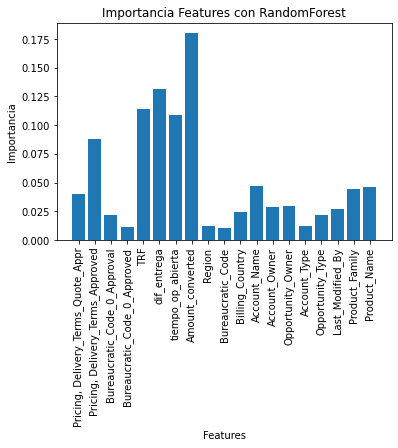

In [ ]:
plt.bar(X_train2.columns, (clf.best_estimator_).feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RandomForest')
plt.xticks(rotation=90)
plt.show()

**PRUEBA DE SET TEST**

In [ ]:

df_test['Opportunity_Created_Date'] = pd.to_datetime(df_test['Opportunity_Created_Date'])
df_test['años'] = df_test['Opportunity_Created_Date'].dt.year
df_test['meses'] = df_test['Opportunity_Created_Date'].dt.month
df_test.sort_values(['años', 'meses'], ascending=True, inplace=True)

df_test=df_test.drop('ID', axis=1)
df_test = df_test.drop('Territory', axis=1)
df_test = df_test.drop('Submitted_for_Approval', axis=1)
df_test = df_test.drop('Prod_Category_A', axis=1)
df_test = df_test.drop('Actual_Delivery_Date', axis=1)
df_test = df_test.drop('Last_Activity', axis=1)
df_test = df_test.drop('Quote_Type', axis=1)
df_test = df_test.drop('Brand', axis=1)
df_test = df_test.drop('Product_Type', axis=1)
df_test = df_test.drop('Size', axis=1)
df_test = df_test.drop('Product_Category_B', axis=1)
df_test = df_test.drop('Price', axis=1)
df_test = df_test.drop('Currency', axis=1)
df_test=df_test.drop('Source ', axis=1)
df_test=df_test.drop('Sales_Contract_No', axis=1)
df_test=df_test.drop('Account_Created_Date',axis=1)
df_test = df_test.drop('Opportunity_Name',axis=1)
df_test=df_test.drop('Delivery_Terms',axis=1)



df_test=df_test.drop('Delivery_Year',axis=1)
df_test=df_test.drop('Delivery_Quarter',axis=1)
df_test=df_test.drop('Month',axis=1)


df_test['Planned_Delivery_Start_Date'] = pd.to_datetime(df_test['Planned_Delivery_Start_Date'])
df_test['Planned_Delivery_End_Date'] = pd.to_datetime(df_test['Planned_Delivery_End_Date'])
df_test['dif_entrega']=df_test['Planned_Delivery_End_Date']-df_test['Planned_Delivery_Start_Date']


df_test=df_test.drop('Planned_Delivery_End_Date',axis=1)
df_test=df_test.drop('Planned_Delivery_Start_Date',axis=1)

df_test['Last_Modified_Date'] = pd.to_datetime(df_test['Last_Modified_Date'])
df_test['tiempo_op_abierta']=df_test['Last_Modified_Date']-df_test['Opportunity_Created_Date']

df_test=df_test.drop('Opportunity_Created_Date',axis=1)
df_test=df_test.drop('Last_Modified_Date',axis=1)
df_test=df_test.drop('Quote_Expiry_Date',axis=1)

cambio_binario = {'AUD' : 0.77, 'EUR' : 1.21, 'GBP':1.40, 'JPY':0.0094, 'USD':1}
df_test['moneda'] = df_test['Total_Taxable_Amount_Currency']
df_test['moneda'] = df_test['moneda'].map(cambio_binario)

df_test['Amount_converted'] = df_test['moneda']*df_test['Total_Taxable_Amount']

df_test=df_test.drop('moneda',axis=1)
df_test=df_test.drop('Total_Amount',axis=1)
df_test=df_test.drop('Total_Amount_Currency',axis=1)
df_test=df_test.drop('Total_Taxable_Amount',axis=1)
df_test=df_test.drop('Total_Taxable_Amount_Currency',axis=1)

df_test=df_test.drop('ASP',axis=1)
df_test=df_test.drop('ASP_Currency',axis=1)
df_test=df_test.drop('ASP_(converted)_Currency',axis=1)

df_test=df_test.drop('años',axis=1)
df_test=df_test.drop('meses',axis=1)
df_test

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Account_Name,Opportunity_ID,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name,ASP_(converted),TRF,dif_entrega,tiempo_op_abierta,Amount_converted
116,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1632,10756,Person_Name_64,Person_Name_64,Account_Type_0,Opportunity_Type_4,Person_Name_64,Product_Family_168,Product_Name_322,0.45500,0,0 days,1 days,14414.400
117,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Account_Name_1737,10757,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_1,Person_Name_9,Product_Family_213,Product_Name_447,0.42000,0,0 days,74 days,4851.000
118,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1635,10758,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_8,Person_Name_9,Product_Family_213,Product_Name_447,0.39000,0,0 days,49 days,36179.550
119,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1635,10758,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_8,Person_Name_9,Product_Family_162,Product_Name_298,0.47000,0,0 days,49 days,36179.550
120,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1635,10758,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_8,Person_Name_9,Product_Family_168,Product_Name_322,0.46000,0,0 days,49 days,36179.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,EMEA,1,1,0,0,Bureaucratic_Code_4,South Africa,Account_Name_1686,12364,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Person_Name_13,Product_Family_213,Product_Name_447,0.30000,0,9 days,0 days,147750.000
2547,Americas,1,1,0,0,Bureaucratic_Code_4,United States,Account_Name_768,12365,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_1,Person_Name_38,Product_Family_221,Product_Name_477,0.41000,0,91 days,1 days,45054.900
2548,Americas,1,1,1,1,Bureaucratic_Code_4,United States,Account_Name_768,12366,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_1,Person_Name_38,Product_Family_221,Product_Name_477,0.41000,0,91 days,1 days,100122.000
2549,Americas,1,1,0,0,Bureaucratic_Code_4,United States,Account_Name_1635,12367,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_7,Person_Name_9,Product_Family_156,Product_Name_281,0.50000,0,0 days,0 days,143220.000


In [ ]:
df_test['dif_entrega']=df_test['dif_entrega'].apply(lambda x: x.value)
df_test['tiempo_op_abierta']=df_test['tiempo_op_abierta'].apply(lambda x: x.value)

In [ ]:
df_ML_test_cat = df_test[cat_cols]
df_ML_test_cat

,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
116,Americas,Bureaucratic_Code_4,United States,Account_Name_1632,Person_Name_64,Person_Name_64,Account_Type_0,Opportunity_Type_4,Person_Name_64,Product_Family_168,Product_Name_322
117,Americas,Bureaucratic_Code_4,United States,Account_Name_1737,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_1,Person_Name_9,Product_Family_213,Product_Name_447
118,Americas,Bureaucratic_Code_5,United States,Account_Name_1635,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_8,Person_Name_9,Product_Family_213,Product_Name_447
119,Americas,Bureaucratic_Code_5,United States,Account_Name_1635,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_8,Person_Name_9,Product_Family_162,Product_Name_298
120,Americas,Bureaucratic_Code_5,United States,Account_Name_1635,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_8,Person_Name_9,Product_Family_168,Product_Name_322
...,...,...,...,...,...,...,...,...,...,...,...
2546,EMEA,Bureaucratic_Code_4,South Africa,Account_Name_1686,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Person_Name_13,Product_Family_213,Product_Name_447
2547,Americas,Bureaucratic_Code_4,United States,Account_Name_768,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_1,Person_Name_38,Product_Family_221,Product_Name_477
2548,Americas,Bureaucratic_Code_4,United States,Account_Name_768,Person_Name_38,Person_Name_38,Account_Type_2,Opportunity_Type_1,Person_Name_38,Product_Family_221,Product_Name_477
2549,Americas,Bureaucratic_Code_4,United States,Account_Name_1635,Person_Name_9,Person_Name_9,Account_Type_2,Opportunity_Type_7,Person_Name_9,Product_Family_156,Product_Name_281


In [ ]:
enc = TargetEncoder(cols=df_ML_test_cat, handle_unknown='value', return_df=False)
enc.fit(df_ML_test_cat,df_test['Opportunity_ID'])
df_mean_encoding_test = pd.DataFrame(enc.transform(df_ML_test_cat))
df_mean_encoding_test

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,0,1,2,3,4,5,6,7,8,9,10
0,11583.837598,11564.006000,11579.642285,11595.599962,11616.687023,11625.741176,11545.621333,11610.415657,11620.063063,11565.035806,11598.571429
1,11583.837598,11564.006000,11579.642285,11355.176458,11718.321429,11707.037037,11528.548833,11504.536007,11562.944954,11561.680272,11509.916667
2,11583.837598,11412.471698,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11593.290076,11562.944954,11561.680272,11509.916667
3,11583.837598,11412.471698,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11593.290076,11562.944954,11528.062500,11546.858333
4,11583.837598,11412.471698,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11593.290076,11562.944954,11565.035806,11598.571429
...,...,...,...,...,...,...,...,...,...,...,...
2546,11503.219570,11564.006000,12145.074303,12145.074303,11525.508876,11531.962733,11545.621333,11504.536007,11538.538462,11561.680272,11509.916667
2547,11583.837598,11564.006000,11579.642285,12092.660327,11560.860759,11552.820513,11528.548833,11504.536007,11538.681159,11452.991870,11716.344828
2548,11583.837598,11564.006000,11579.642285,12092.660327,11560.860759,11552.820513,11528.548833,11504.536007,11538.681159,11452.991870,11716.344828
2549,11583.837598,11564.006000,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11647.177469,11562.944954,11732.142857,11763.892857


In [ ]:
df_mean_encoding_test.rename(columns={0:'Region',1:'Bureaucratic_Code',2:'Billing_Country',3:'Account_Name',4:	'Account_Owner',5:	'Opportunity_Owner',6:'Account_Type',7:'Opportunity_Type',8:'Last_Modified_By',9:'Product_Family',10:'Product_Name'},inplace=True)
df_mean_encoding_test

,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
0,11583.837598,11564.006000,11579.642285,11595.599962,11616.687023,11625.741176,11545.621333,11610.415657,11620.063063,11565.035806,11598.571429
1,11583.837598,11564.006000,11579.642285,11355.176458,11718.321429,11707.037037,11528.548833,11504.536007,11562.944954,11561.680272,11509.916667
2,11583.837598,11412.471698,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11593.290076,11562.944954,11561.680272,11509.916667
3,11583.837598,11412.471698,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11593.290076,11562.944954,11528.062500,11546.858333
4,11583.837598,11412.471698,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11593.290076,11562.944954,11565.035806,11598.571429
...,...,...,...,...,...,...,...,...,...,...,...
2546,11503.219570,11564.006000,12145.074303,12145.074303,11525.508876,11531.962733,11545.621333,11504.536007,11538.538462,11561.680272,11509.916667
2547,11583.837598,11564.006000,11579.642285,12092.660327,11560.860759,11552.820513,11528.548833,11504.536007,11538.681159,11452.991870,11716.344828
2548,11583.837598,11564.006000,11579.642285,12092.660327,11560.860759,11552.820513,11528.548833,11504.536007,11538.681159,11452.991870,11716.344828
2549,11583.837598,11564.006000,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11647.177469,11562.944954,11732.142857,11763.892857


In [ ]:
df_ML_test = pd.concat([df_test.drop(columns=cat_cols), df_mean_encoding_test], axis=1)
df_ML_test

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Opportunity_ID,ASP_(converted),TRF,dif_entrega,tiempo_op_abierta,Amount_converted,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
0,1,1,1,1,10689,0.36761,0,2592000000000000,0,444576.990,11583.837598,11564.006000,11579.642285,11595.599962,11616.687023,11625.741176,11545.621333,11610.415657,11620.063063,11565.035806,11598.571429
1,1,1,1,1,10689,0.36195,0,2592000000000000,0,444576.990,11583.837598,11564.006000,11579.642285,11355.176458,11718.321429,11707.037037,11528.548833,11504.536007,11562.944954,11561.680272,11509.916667
2,1,1,1,1,10689,0.31105,0,2592000000000000,0,444576.990,11583.837598,11412.471698,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11593.290076,11562.944954,11561.680272,11509.916667
3,1,1,1,1,10690,0.36761,1,2332800000000000,1123200000000000,916918.035,11583.837598,11412.471698,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11593.290076,11562.944954,11528.062500,11546.858333
4,1,1,1,1,10690,0.36195,0,2419200000000000,1123200000000000,916918.035,11583.837598,11412.471698,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11593.290076,11562.944954,11565.035806,11598.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,1,1,0,0,12364,0.30000,0,777600000000000,0,147750.000,11503.219570,11564.006000,12145.074303,12145.074303,11525.508876,11531.962733,11545.621333,11504.536007,11538.538462,11561.680272,11509.916667
2547,1,1,0,0,12365,0.41000,0,7862400000000000,86400000000000,45054.900,11583.837598,11564.006000,11579.642285,12092.660327,11560.860759,11552.820513,11528.548833,11504.536007,11538.681159,11452.991870,11716.344828
2548,1,1,1,1,12366,0.41000,0,7862400000000000,86400000000000,100122.000,11583.837598,11564.006000,11579.642285,12092.660327,11560.860759,11552.820513,11528.548833,11504.536007,11538.681159,11452.991870,11716.344828
2549,1,1,0,0,12367,0.50000,0,0,0,143220.000,11583.837598,11564.006000,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11647.177469,11562.944954,11732.142857,11763.892857


In [ ]:
((df_ML_test['Account_Name']).isnull()).value_counts()

False    2551
Name: Account_Name, dtype: int64

In [ ]:
df_ML_test_nonull = df_ML_test.drop('ASP_(converted)',axis=1)
df_ML_test_nonull

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Opportunity_ID,TRF,dif_entrega,tiempo_op_abierta,Amount_converted,Region,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name
0,1,1,1,1,10689,0,2592000000000000,0,444576.990,11583.837598,11564.006000,11579.642285,11595.599962,11616.687023,11625.741176,11545.621333,11610.415657,11620.063063,11565.035806,11598.571429
1,1,1,1,1,10689,0,2592000000000000,0,444576.990,11583.837598,11564.006000,11579.642285,11355.176458,11718.321429,11707.037037,11528.548833,11504.536007,11562.944954,11561.680272,11509.916667
2,1,1,1,1,10689,0,2592000000000000,0,444576.990,11583.837598,11412.471698,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11593.290076,11562.944954,11561.680272,11509.916667
3,1,1,1,1,10690,1,2332800000000000,1123200000000000,916918.035,11583.837598,11412.471698,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11593.290076,11562.944954,11528.062500,11546.858333
4,1,1,1,1,10690,0,2419200000000000,1123200000000000,916918.035,11583.837598,11412.471698,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11593.290076,11562.944954,11565.035806,11598.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,1,1,0,0,12364,0,777600000000000,0,147750.000,11503.219570,11564.006000,12145.074303,12145.074303,11525.508876,11531.962733,11545.621333,11504.536007,11538.538462,11561.680272,11509.916667
2547,1,1,0,0,12365,0,7862400000000000,86400000000000,45054.900,11583.837598,11564.006000,11579.642285,12092.660327,11560.860759,11552.820513,11528.548833,11504.536007,11538.681159,11452.991870,11716.344828
2548,1,1,1,1,12366,0,7862400000000000,86400000000000,100122.000,11583.837598,11564.006000,11579.642285,12092.660327,11560.860759,11552.820513,11528.548833,11504.536007,11538.681159,11452.991870,11716.344828
2549,1,1,0,0,12367,0,0,0,143220.000,11583.837598,11564.006000,11579.642285,11026.258747,11718.321429,11707.037037,11528.548833,11647.177469,11562.944954,11732.142857,11763.892857


In [ ]:
pred = clf.predict_proba(df_ML_test_nonull.drop(columns='Opportunity_ID'))
pred

array([[0.489     , 0.511     ],
       [0.489     , 0.511     ],
       [0.489     , 0.511     ],
       ...,
       [0.51244444, 0.48755556],
       [0.23238889, 0.76761111],
       [0.62788889, 0.37211111]])

In [ ]:
predicciones = pd.Series(pred[:,1])
resultados = pd.concat([df_ML_test['Opportunity_ID'], predicciones], axis=1).rename(columns={0: 'Target'})

In [ ]:
res_promedio = resultados.groupby('Opportunity_ID').mean()

In [ ]:
res_promedio.reset_index(inplace=True)
res_promedio

,Opportunity_ID,Target
0,10689,0.511000
1,10690,0.433389
2,10691,0.586730
3,10692,0.570778
4,10693,0.461852
...,...,...
1562,12364,0.644222
1563,12365,0.510508
1564,12366,0.487556
1565,12367,0.767611


In [ ]:
((res_promedio['Opportunity_ID'].value_counts()) > 1).value_counts()

False    1567
Name: Opportunity_ID, dtype: int64

In [ ]:
res_promedio.drop_duplicates(subset='Opportunity_ID', inplace=True)
res_promedio

,Opportunity_ID,Target
0,10689,0.511000
1,10690,0.433389
2,10691,0.586730
3,10692,0.570778
4,10693,0.461852
...,...,...
1562,12364,0.644222
1563,12365,0.510508
1564,12366,0.487556
1565,12367,0.767611


In [ ]:
res_promedio.to_csv('results.csv', index=False)

In [ ]:
train.head(60)

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Account_Name,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Last_Modified_By,Product_Family,Product_Name,ASP_(converted),TRF,Stage,años,meses,dif_entrega,tiempo_op_abierta,Amount_converted,unos
16104,EMEA,0,0,0,0,Bureaucratic_Code_4,France,Account_Name_34,Person_Name_16,Person_Name_16,Account_Type_5,Opportunity_Type_1,Person_Name_16,Product_Family_133,Product_Name_221,0.35629,2,0,2013,11,0.0,1775,8.013679e+05,1
16105,APAC,1,1,1,1,Bureaucratic_Code_3,Germany,Account_Name_272,Person_Name_4,Person_Name_4,Account_Type_5,Opportunity_Type_19,Person_Name_4,Product_Family_77,Product_Name_98,0.49000,20,0,2014,3,31.0,859,9.803430e+06,1
16106,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,0.68000,0,0,2014,3,30.0,908,3.418632e+05,1
16107,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_359,Person_Name_45,Person_Name_8,Account_Type_2,Opportunity_Type_1,Person_Name_8,Product_Family_164,Product_Name_310,0.68000,0,0,2014,3,30.0,908,3.418632e+05,1
16108,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Person_Name_33,Product_Family_158,Product_Name_287,0.74000,6,1,2014,5,28.0,485,3.141078e+07,1
16109,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Person_Name_33,Product_Family_151,Product_Name_273,0.74000,3,1,2014,5,28.0,485,3.141078e+07,1
16110,APAC,1,0,0,0,Bureaucratic_Code_5,Pakistan,Account_Name_1711,Person_Name_49,Person_Name_49,Account_Type_2,Opportunity_Type_3,Person_Name_49,Product_Family_77,Product_Name_100,0.55000,0,0,2014,5,30.0,681,1.644500e+05,1
16111,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Person_Name_33,Product_Family_164,Product_Name_308,0.74000,3,1,2014,6,59.0,414,3.163769e+07,1
16112,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Account_Name_1337,Person_Name_38,Person_Name_12,Account_Type_2,Opportunity_Type_19,Person_Name_33,Product_Family_158,Product_Name_286,0.74000,14,1,2014,6,59.0,414,3.163769e+07,1
16113,APAC,1,1,1,1,Bureaucratic_Code_4,Philippines,Account_Name_1190,Person_Name_44,Person_Name_44,None,Opportunity_Type_19,Person_Name_44,Product_Family_77,Product_Name_97,0.42000,2,0,2014,7,60.0,782,8.408400e+05,1


In [ ]:
des=train.groupby('Opportunity_ID').agg({'Total_Taxable_Amount':'max','Total_Taxable_Amount_Currency':'max','TRF':'max'})
des.sort_values(['Total_Taxable_Amount'], ascending=True, inplace=True)
des.head(50)
(des['Total_Taxable_Amount']==0).value_counts()

KeyError: ignored

In [ ]:
des=train.groupby('Opportunity_ID').agg({'Total_Taxable_Amount':'max','Total_Taxable_Amount_Currency':'max','TRF':'max'})
des.sort_values(['Total_Taxable_Amount'], ascending=False, inplace=True)
des.head(50)
(des['TRF']==0).value_counts()

In [ ]:
des = des.drop(des[des['TRF']>0].index)
des.iloc[240:300,:]

In [ ]:
train.head(30)

In [ ]:
holi=pd.read_csv('Train_TP2_Datos_2020-2C.csv')
holi = holi[(holi.Stage == 'Closed Won') | (holi.Stage == 'Closed Lost')]
cambio_binario = {'Closed Lost' : 0, 'Closed Won' : 1}
holi['Stage'] = holi['Stage'].map(cambio_binario)
holi['Opportunity_Created_Date'] = pd.to_datetime(holi['Opportunity_Created_Date'])
holi['años'] = holi['Opportunity_Created_Date'].dt.year
holi['meses'] = holi['Opportunity_Created_Date'].dt.month
holi.sort_values(['años', 'meses'], ascending=True, inplace=True)
holi
holi['Last_Modified_Date'] = pd.to_datetime(holi['Last_Modified_Date'])
holi['unos']=1
holi['añomodi'] = holi['Last_Modified_Date'].dt.year
holi['dif']= holi['añomodi']-holi['años']
holi=holi.groupby('dif').agg({'Stage':'sum','unos':'sum'})
holi['prom']=(holi['Stage']/holi['unos'])
holi['prom_pond']=(holi['Stage']/holi['unos'])*holi['unos']/1000
holi

In [ ]:
gola = train
gola['unos'] = 1
gola=gola.groupby('Account_Type').agg({'Stage':'sum', 'unos':'sum'})
gola['prom']=gola['Stage']/gola['unos']
gola['prom_pond']=(gola['Stage']/gola['unos'])*gola['unos']/1000
gola

In [ ]:
gola = train
gola['unos'] = 1
gola=gola.groupby('Account_Name').agg({'Stage':'sum', 'unos':'sum'})
gola['prom']=gola['Stage']/gola['unos']
gola.head(20)

In [ ]:
gola = train
gola['unos'] = 1
gola=gola.groupby('Bureaucratic_Code').agg({'Stage':'sum', 'unos':'sum'})
gola['prom']=gola['Stage']/gola['unos']
gola

In [ ]:
df_test

In [ ]:
df_test['unos']=1
df_test.groupby('Bureaucratic_Code').agg({'unos':'sum'})

In [ ]:
train['Planned_Delivery_End_Date'] = pd.to_datetime(train['Planned_Delivery_End_Date'])
hola = train
hola['unos']=1
hola['mess'] = train['Planned_Delivery_End_Date'].dt.month
hola=hola.groupby('mess').agg({'Stage':'sum','unos':'sum'})
hola['prom']=hola['Stage']/hola['unos']
hola.sort_values(['unos'], ascending=True, inplace=True)
hola

In [ ]:
train['Planned_Delivery_End_Date'] = pd.to_datetime(train['Planned_Delivery_End_Date'])
hola = train
hola['unos']=1
hola['mess'] = train['Planned_Delivery_End_Date'].dt.month
hola=hola.groupby('Opportunity_ID').agg({'Stage':'max','unos':'max', 'Planned_Delivery_End_Date':'max','mess':'max'})
hola=hola.groupby('mess').agg({'Stage':'sum','unos':'sum'})
hola['prom']=hola['Stage']/hola['unos']
hola.sort_values(['unos'], ascending=True, inplace=True)
hola

In [ ]:
train_nuevo = pd.read_csv('Train_TP2_Datos_2020-2C.csv')

train_nuevo = train_nuevo[(train_nuevo.Stage == 'Closed Won') | (train_nuevo.Stage == 'Closed Lost')]
cambio_binario = {'Closed Lost' : 0, 'Closed Won' : 1}
train_nuevo['Stage'] = train_nuevo['Stage'].map(cambio_binario)
train_nuevo['Opportunity_Created_Date'] = pd.to_datetime(train_nuevo['Opportunity_Created_Date'])
train_nuevo['años'] = train_nuevo['Opportunity_Created_Date'].dt.year
train_nuevo['meses'] = train_nuevo['Opportunity_Created_Date'].dt.month
train_nuevo.sort_values(['años', 'meses'], ascending=True, inplace=True)

train_nuevo['Planned_Delivery_Start_Date'] = pd.to_datetime(train_nuevo['Planned_Delivery_Start_Date'])
train_nuevo['Planned_Delivery_End_Date'] = pd.to_datetime(train_nuevo['Planned_Delivery_End_Date'])
train_nuevo['unos']=1
train_nuevo=train_nuevo.groupby('Opportunity_ID').agg({'Stage':'max','unos':'max', 'Planned_Delivery_End_Date':'max', 'Planned_Delivery_Start_Date':'max'})
train_nuevo['hi']= train_nuevo['Planned_Delivery_End_Date']-train_nuevo['Planned_Delivery_Start_Date']
train_nuevo=train_nuevo.groupby('hi').agg({'Stage':'sum','unos':'sum'})
train_nuevo['prom']=train_nuevo['Stage']/train_nuevo['unos']

train_nuevo.tail(60)
train_nuevo.iloc[120:180,:]
train_nuevo.iloc[60:120,:]
train_nuevo.head(60)

In [ ]:
train['Last_Modified_Date'] = pd.to_datetime(train['Last_Modified_Date'])
hola = train
hola['unos']=1
hola=hola.groupby('Opportunity_ID').agg({'Stage':'max','unos':'max', 'Opportunity_Created_Date':'max', 'Last_Modified_Date':'max'})
hola['hi']= hola['Last_Modified_Date']-hola['Opportunity_Created_Date']
hola=hola.groupby('hi').agg({'Stage':'sum','unos':'sum'})
hola['prom']=hola['Stage']/hola['unos']
hola['prom_pond']=(hola['Stage']/hola['unos'])*hola['unos']/10

hola.head(60)
hola.iloc[240:300,:]
hola
hola.iloc[240:300,:]

In [ ]:
hola = train
hola['unos']=1
hola=hola.groupby('Delivery_Terms').agg({'Stage':'sum','unos':'sum'})
hola['prom']=(hola['Stage']/hola['unos'])
hola['prom_pond']=(hola['Stage']/hola['unos'])*hola['unos']/1000
hola

In [ ]:
hola = train
hola['unos']=1
hola=hola.groupby('Total_Taxable_Amount').agg({'Stage':'sum','unos':'sum'})
hola['prom']=hola['Stage']/hola['unos']
hola

In [ ]:
hola = train
hola['unos']=1
hola=hola.groupby('Account_Owner').agg({'Stage':'sum','unos':'sum'})
hola['prom']=hola['Stage']/hola['unos']
hola

In [ ]:
hola = train
hola['unos']=1
hola=hola.groupby('Region').agg({'Stage':'sum','unos':'sum'})
hola['prom']=hola['Stage']/hola['unos']
hola

In [ ]:
hola = train
hola['unos']=1
hola=hola.groupby('Billing_Country').agg({'Stage':'sum','unos':'sum'})
hola['prom']=hola['Stage']/hola['unos']
hola.head(40)

In [ ]:
(train['Quote_Expiry_Date']=='NaT').value_counts()

In [ ]:
train2=train.drop('Delivery_Year',axis=1)
train2=train2.drop('Delivery_Quarter',axis=1)
train2=train2.drop('Month',axis=1)


train2['Planned_Delivery_Start_Date'] = pd.to_datetime(train2['Planned_Delivery_Start_Date'])
train2['Planned_Delivery_End_Date'] = pd.to_datetime(train2['Planned_Delivery_End_Date'])
train2['dif_entrega']=train2['Planned_Delivery_End_Date']-train2['Planned_Delivery_Start_Date']


train2=train2.drop('Planned_Delivery_End_Date',axis=1)
train2=train2.drop('Planned_Delivery_Start_Date',axis=1)
train2

In [ ]:
train2=train2.drop('unos',axis=1)
train2=train2.drop('dif',axis=1)
train2=train2.drop('añomodi',axis=1)
train2=train2.drop('mess',axis=1)
train2=train2.drop('meses',axis=1)
train2=train2.drop('años',axis=1)
train2=train2.drop('Stage',axis=1)
train2

In [ ]:
ji=train2['Total_Taxable_Amount'] == 0
hol = pd.DataFrame()
hol['hi']=ji
hol
cuenta = train2['Total_Taxable_Amount']
cambio = {'True' : 0, 'False' : cuenta}
train['Stage'] = train['Stage'].map(cambio)